In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math  
import pandas as pd
import os
import pickle

import matplotlib.colors as mc
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)


# extract data

In [6]:
# dat_file = "./data/magnetization_curves_L9_T0.1.dat"   
dat_file = "./data/hxscan_kagome_L9_temp0.100.dat"   

with open(dat_file, 'r') as file:
    text = file.read()
    #print(text)

ary = text.split('\n')
hoverJ_qmc = []
indices = []
for i in range(len(ary)):
    if ary[i][0:6] == "# hz/J":
        hoverJ_qmc.append(ary[i].split(' ')[3])
        #temps.append(ary[i])
        indices.append(i)
indices.append(len(ary))
hoverJ_qmc = np.array([float(elem) for elem in hoverJ_qmc])
print(indices)
print(hoverJ_qmc)

print('')
print(ary[5])

[2, 37, 72, 107, 142, 177, 212, 247, 282, 337, 391, 446, 500, 555, 610, 653, 696, 739, 782, 822, 865, 908, 951, 994, 1036]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8
 3.  3.2 3.4 3.6 3.8 4. ]

# transverse field (1) | magnz (2) | err_magnz (3) | magnx (4) | err_magnx (5) | energy per site (6) | err_energy (7) | classical bond energy per site (no err given) (8) | Sq(q=2K) (9) | err_Sq(q=2K) (10) | Sq(q=2M) (11) | err_Sq(q=2M) (12) | <m3cos3theta_2K> (13) | err_<m3cos3theta_2K> (14)


In [7]:
ary = text.split('\n')
hoverJ_qmc = []
indices = []
for i in range(len(ary)):
    if ary[i][0:6] == "# hz/J":
        hoverJ_qmc.append(ary[i].split(' ')[3])
        #temps.append(ary[i])
        indices.append(i)
indices.append(len(ary))
hoverJ_qmc = np.array([float(elem) for elem in hoverJ_qmc])
print(indices)
print(hoverJ_qmc)

[2, 37, 72, 107, 142, 177, 212, 247, 282, 337, 391, 446, 500, 555, 610, 653, 696, 739, 782, 822, 865, 908, 951, 994, 1036]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8
 3.  3.2 3.4 3.6 3.8 4. ]


In [8]:
measurements = []

for j in range(len(hoverJ_qmc)):
    all_vals = ary[(indices[j] + 4):(indices[j+1]-4)]
    plot_list = []
    for k in range(len(all_vals)):
        split_arr = all_vals[k].split(' ')
        filtered = [float(elem) for elem in split_arr  if elem != '']
        plot_list.append(filtered)
    measurements.append(plot_list)

# plots

Range of h/J for our graphs (QA):

hoverj_zoom = [0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75]

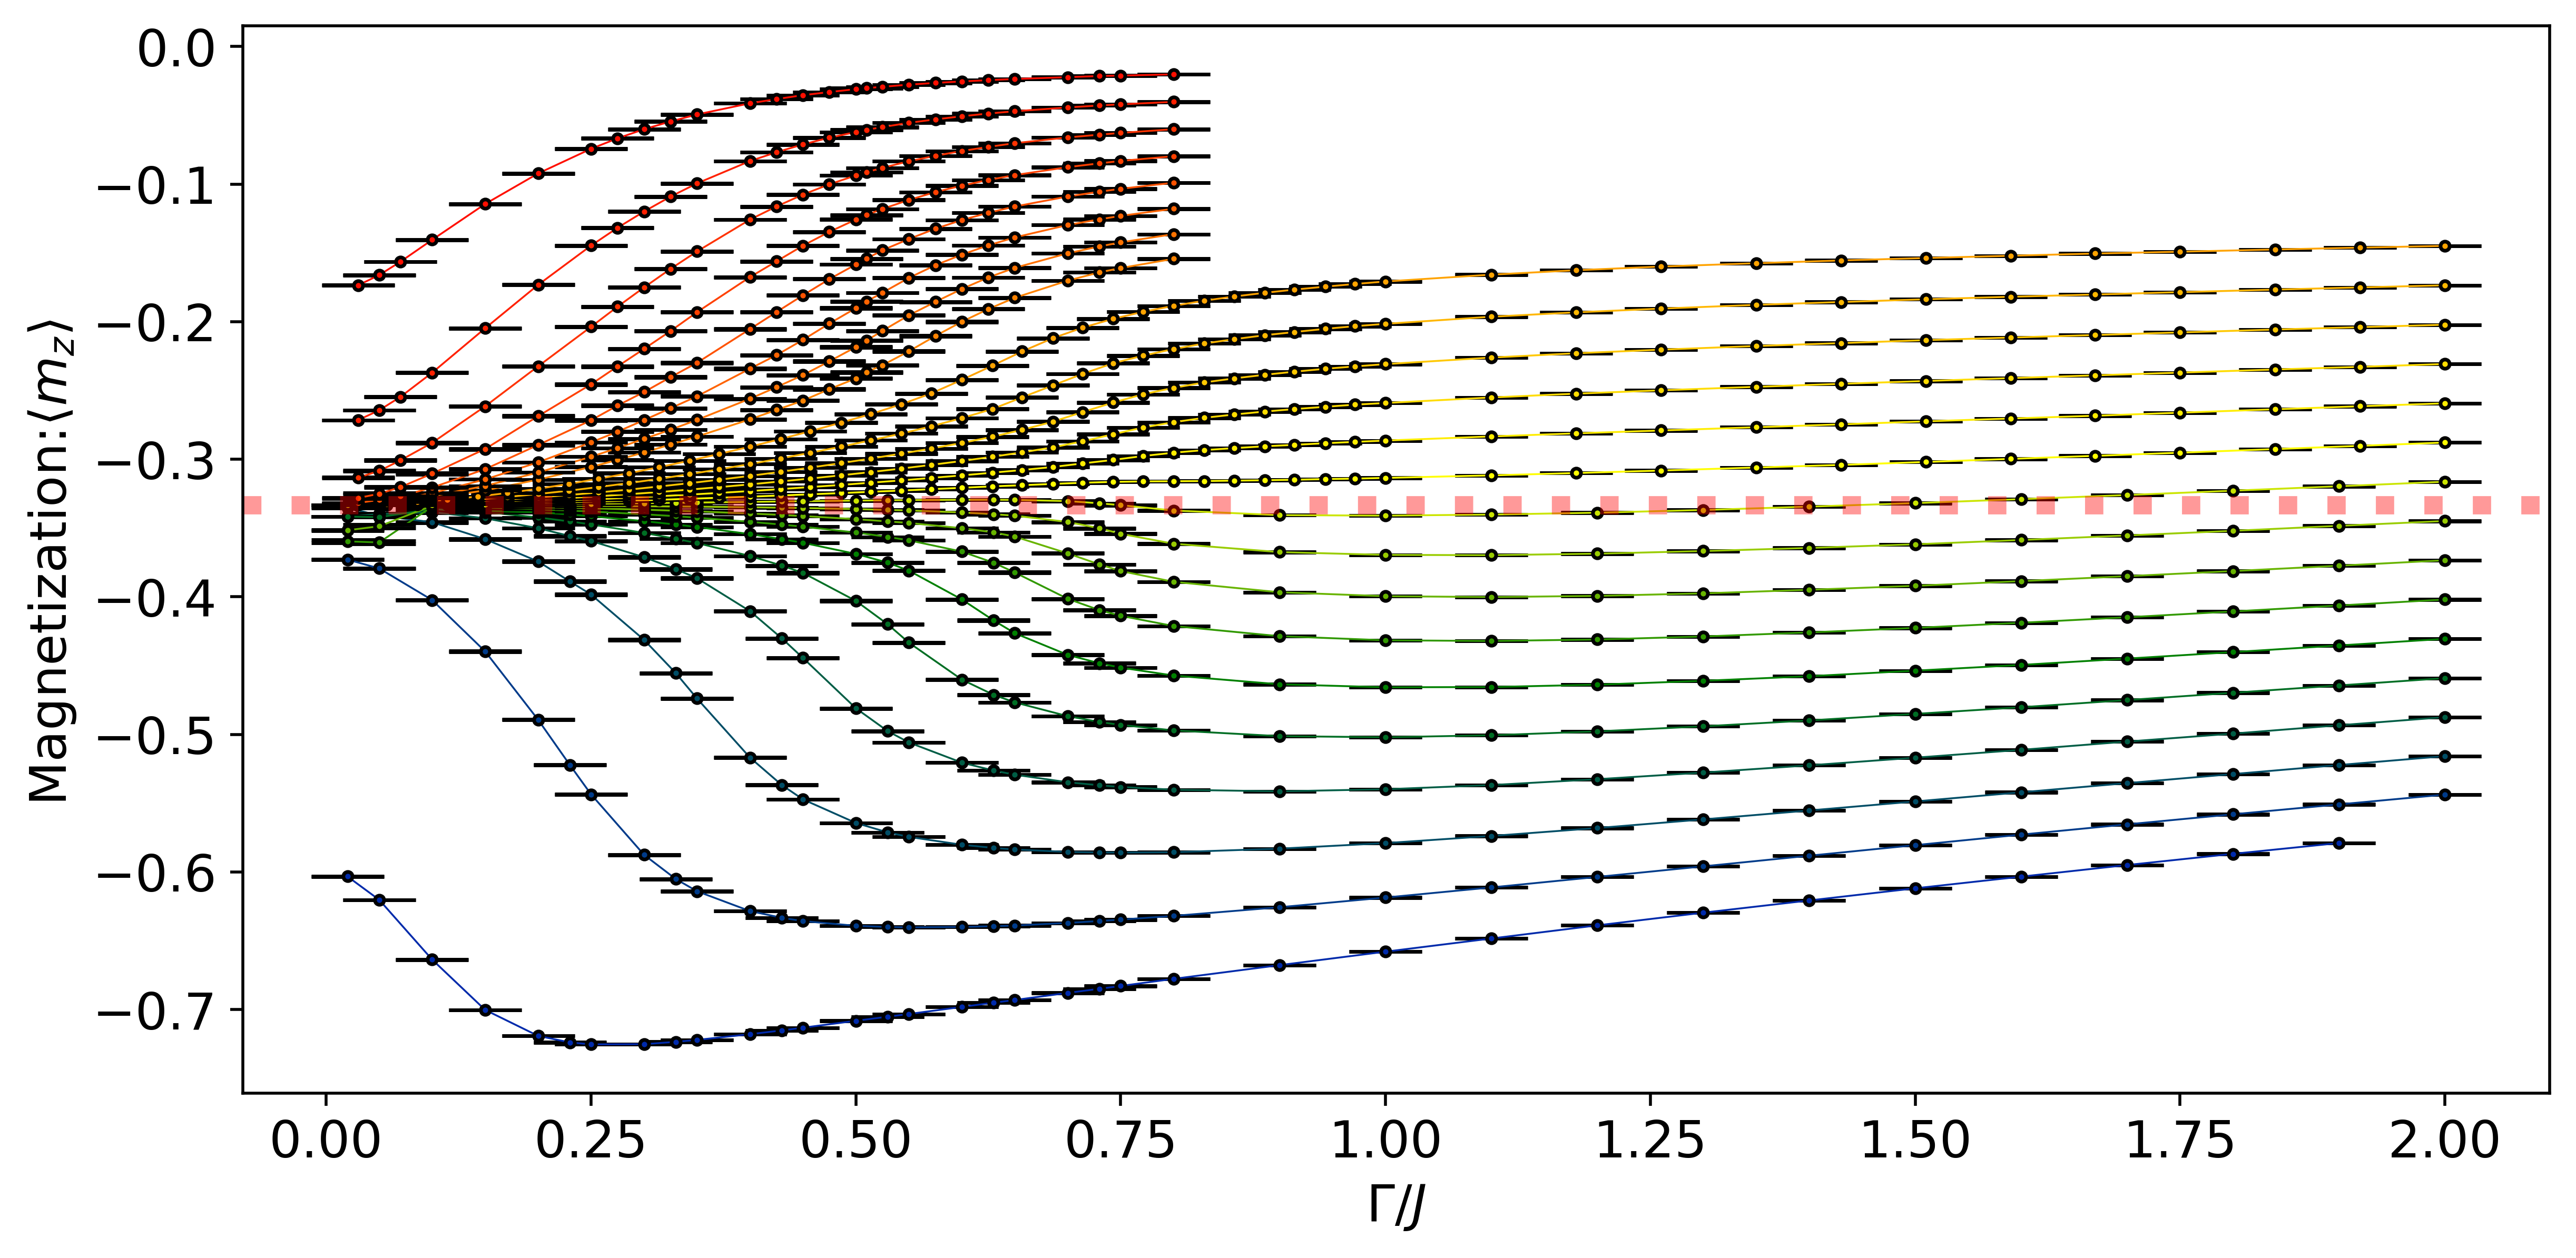

In [40]:
import matplotlib.colors as mc
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)

plt.rcParams['figure.dpi'] = 500
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(10, 5))


for j in range(len(hoverJ)):
    all_vals = ary[(indices[j] + 4):(indices[j+1]-4)]
    plot_ind = 1
    #1 is m_z
    #2 is m_x
    #3 is energy
    #4 is bond energy

    plot_list_x = []
    plot_list_y = []
    plot_list_y_err = []
    for k in range(len(all_vals)):
        split_arr = all_vals[k].split(' ')
        filtered = [elem for elem in split_arr  if elem != '']

        plot_list_x.append(float(filtered[0])) #that's gamma/J
        plot_list_y.append(float(filtered[plot_ind]))
        plot_list_y_err.append(float(filtered[plot_ind + 1]))

    plt.errorbar(
            plot_list_x,
            (-1)*np.array(plot_list_y),
            yerr=plot_list_y_err,
            c= cmap(float(hoverJ[j])/4.5),
            zorder = -j,
            ms=5,
            lw=0.5,
            fmt='.-',
            capsize=10,
            alpha=1,
            ecolor='black',
            markeredgecolor='black',
            elinewidth=1,
        )

plt.axhline(y=-1/3, color='r', linestyle='dotted', alpha=0.4, lw=5, zorder = 0)  # Extend horizontal line across the plots    
# plt.grid()
plt.xlabel(r'$ \Gamma/J $')
plt.ylabel('Magnetization:' + r'$\langle m_z \rangle$ ')
# plt.yticks(np.arange(-0.36,-0.28,0.02))
# plt.xscale('log')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(cvals)
# plt.colorbar(sm, label=r'$ h/J $')
plt.tight_layout()
plt.show()

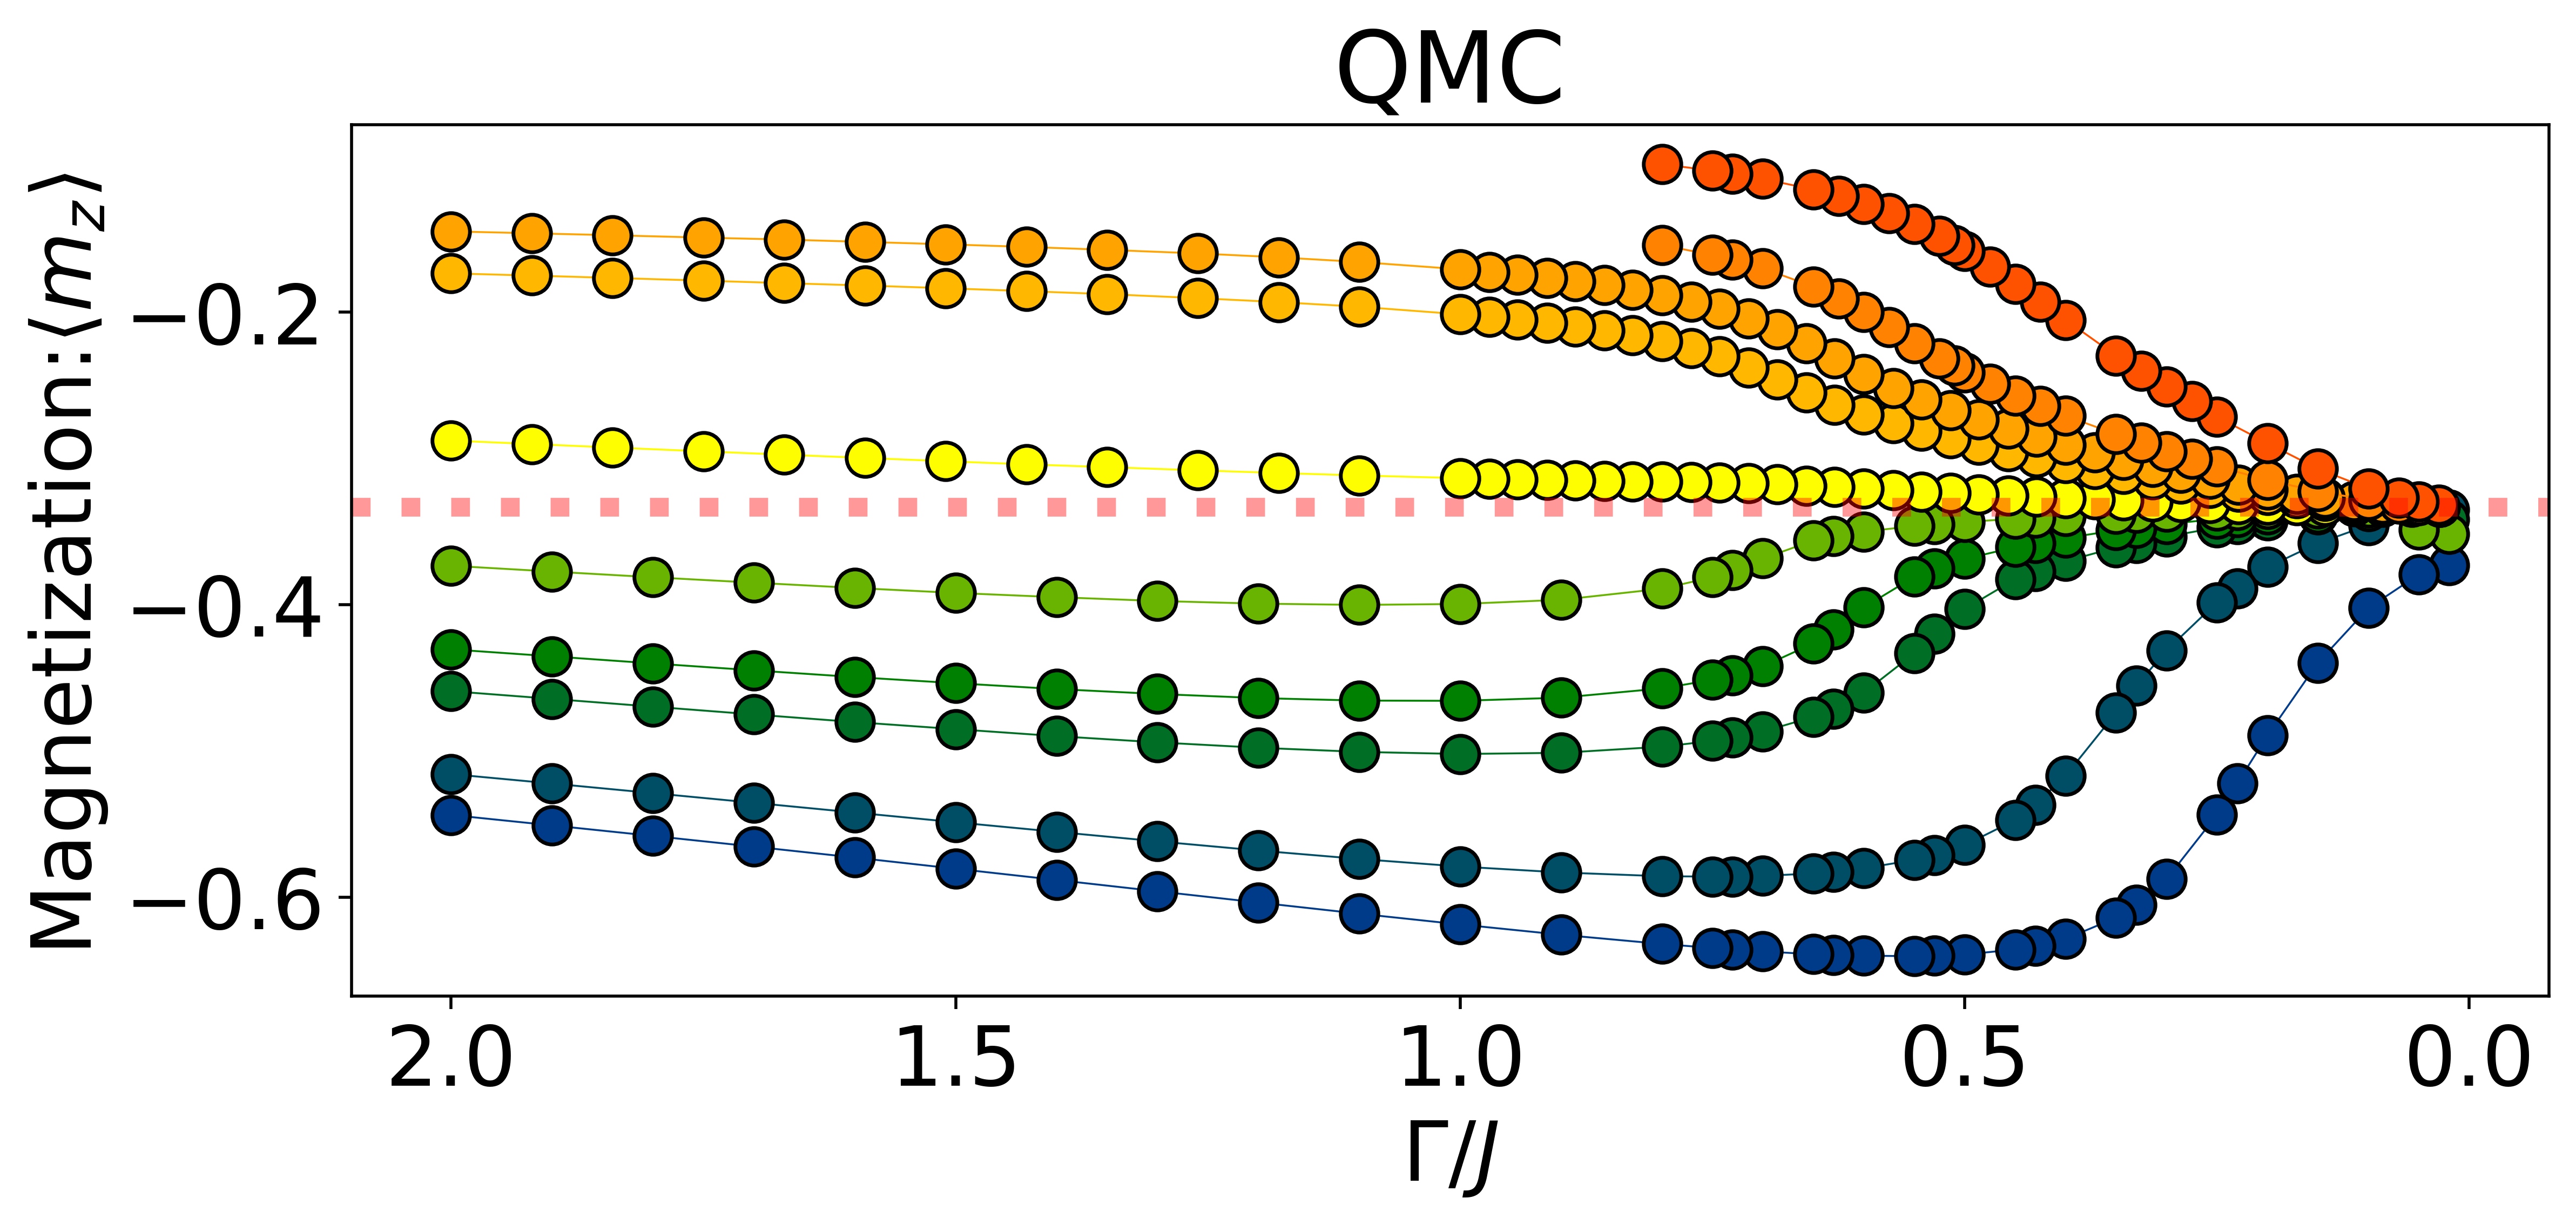

In [101]:
plt.figure(figsize=(10,5), dpi=500)
plt.rcParams.update({'font.size':22})
hoverj_zoom = [0.5, 0.8, 1, 1.2, 2, 2.6, 3, 3.2, 3.6, 3.8]

for i in range(len(measurements)):
    hoverj = hoverJ_qmc[i]
    measurement_at_h = np.array(measurements[i])
    x = measurement_at_h[:,0]
    y = (-1)*measurement_at_h[:,1]
    yerr = measurement_at_h[:,2] 
    
    if (hoverj in hoverj_zoom):
        plt.errorbar(
            x,
            y,
            yerr=yerr,
            c= cmap(hoverj/cvals[-1]),
            zorder = -i,
            ms=20,
            lw=0.5,
            fmt='.-',
            capsize=1,
            alpha=1,
            ecolor='black',
            markeredgecolor='black',
            elinewidth=1,
        )
    
plt.axhline(y=-1/3, color='r', linestyle='dotted', alpha=0.4, lw=5, zorder = 0)  # Extend horizontal line across the plots    
# plt.grid()
plt.xlabel(r'$ \Gamma/J $')
plt.ylabel('Magnetization:' + r'$\langle m_z \rangle$ ')
# plt.yticks(np.arange(-0.36,-0.28,0.02))
# plt.xscale('log')
plt.title('QMC')
ax = plt.gca()
ax.invert_xaxis()

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(cvals)
# plt.colorbar(sm, label=r'$ h/J $')
plt.tight_layout()

plt.show()

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]

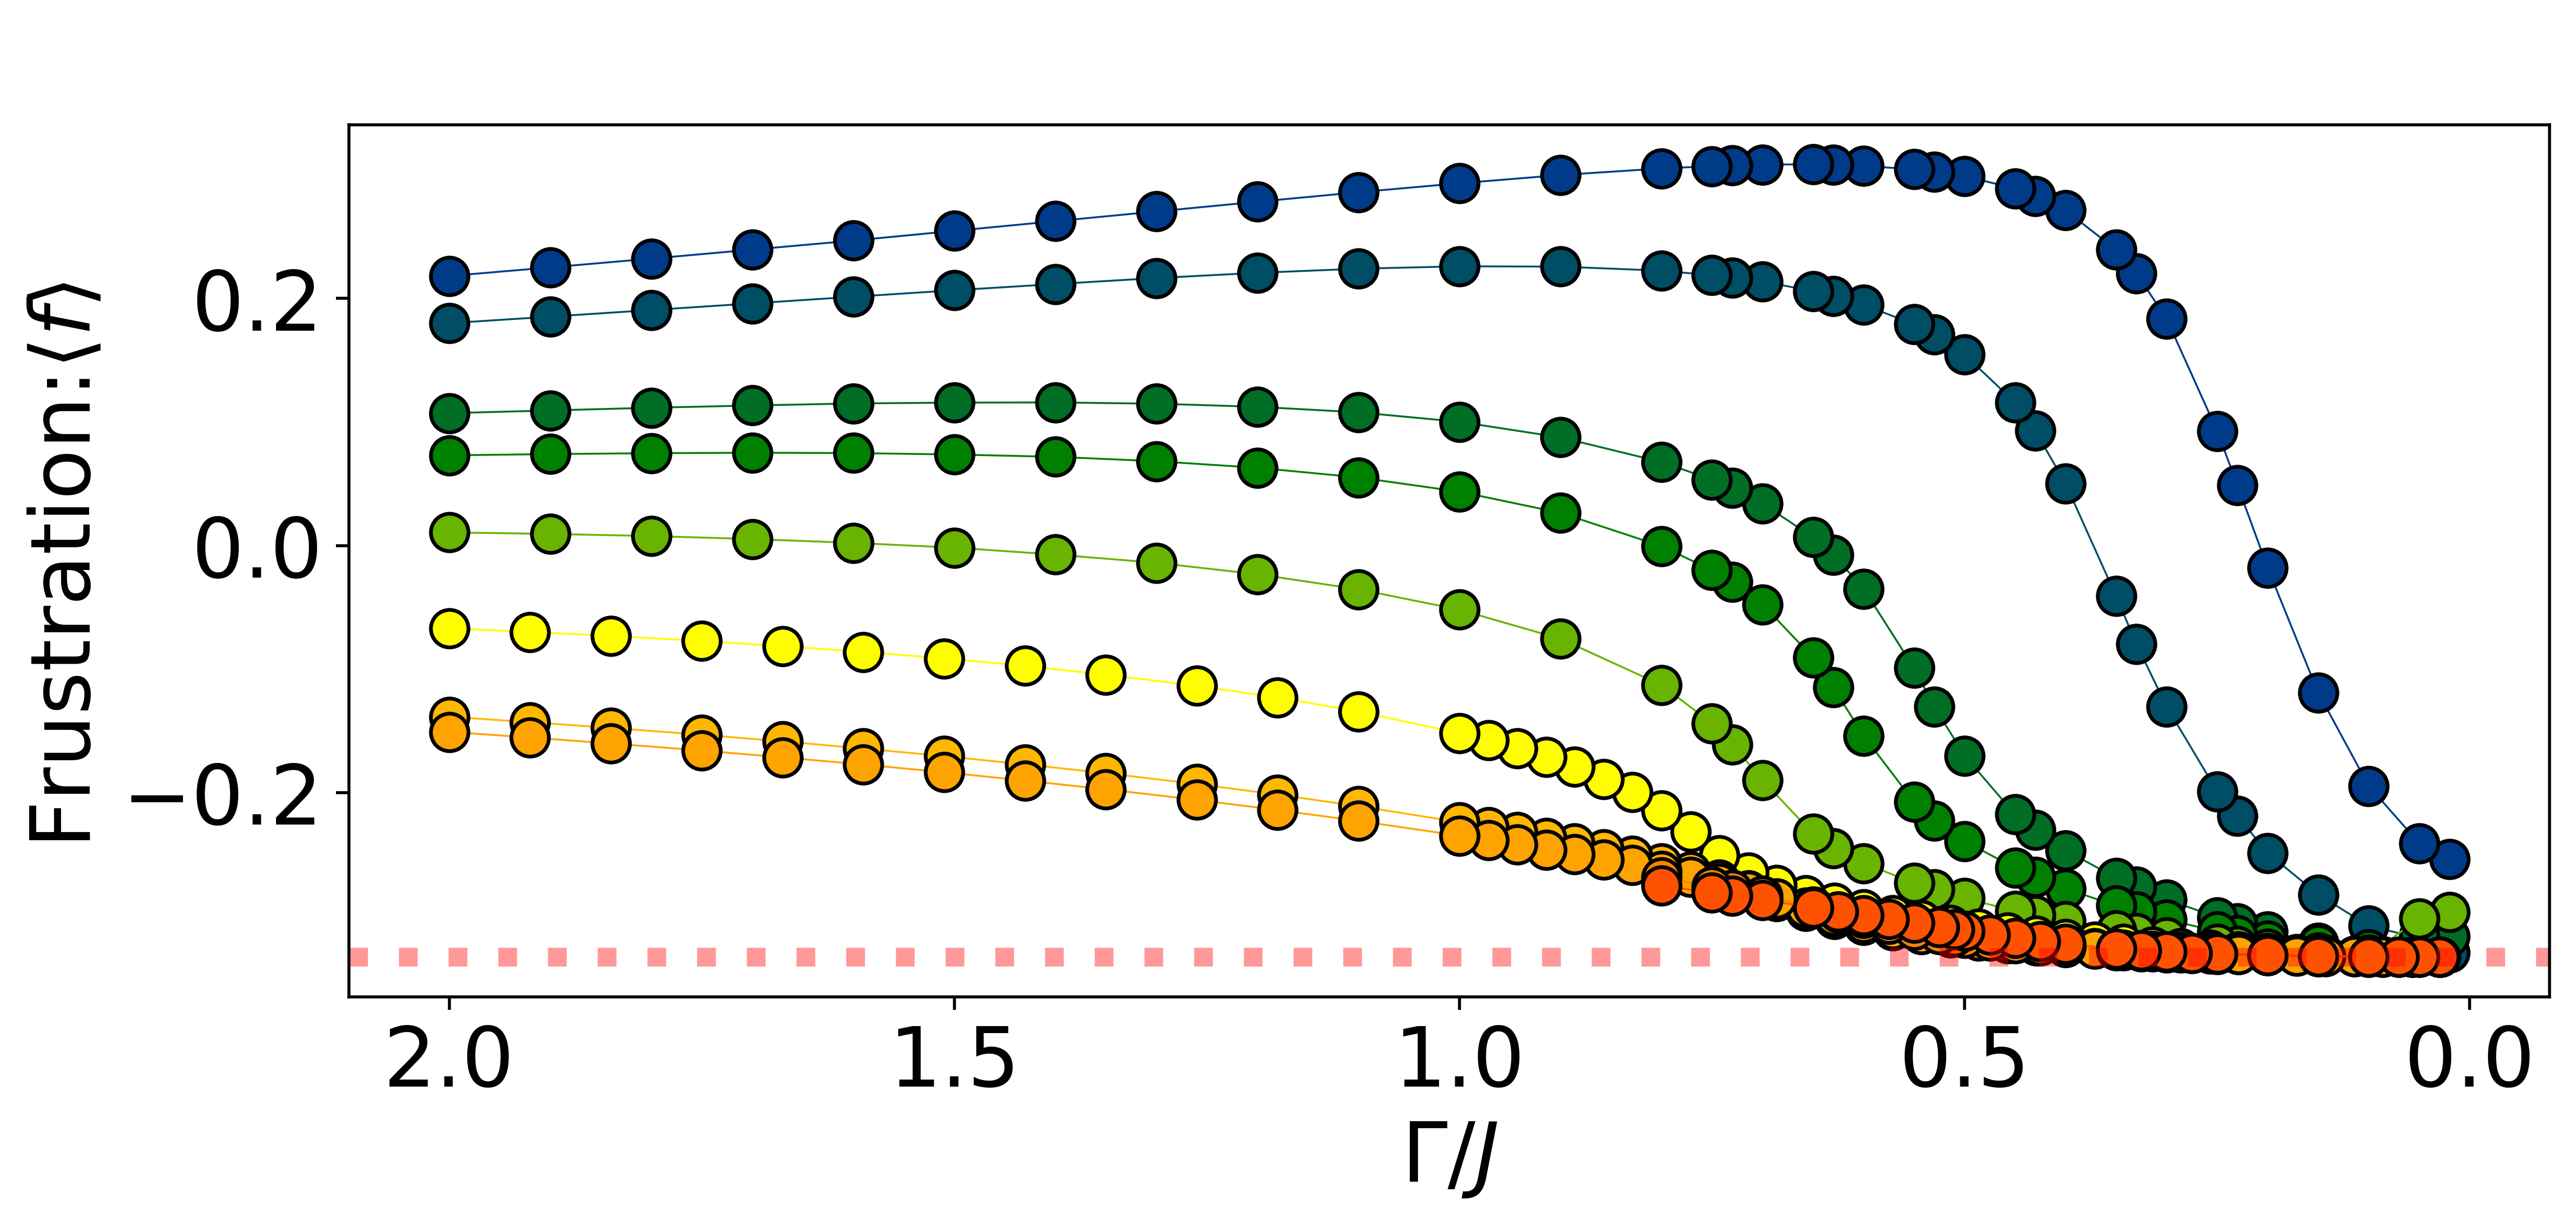

In [106]:
plt.figure(figsize=(10,5), dpi=500)
plt.rcParams.update({'font.size':22})
hoverj_zoom = [0.5, 0.8, 1, 1.2, 2, 2.6, 3, 3.2, 3.6, 3.8]

for i in range(len(measurements)):
    hoverj = hoverJ_qmc[i]
    measurement_at_h = np.array(measurements[i])
    x = measurement_at_h[:,0]
    y = (0.5)*measurement_at_h[:,7]
    yerr = 0.0*measurement_at_h[:,7] 
    
    if (hoverj in hoverj_zoom):
        plt.errorbar(
            x,
            y,
            yerr=yerr,
            c= cmap(hoverj/cvals[-1]),
            zorder = -i,
            ms=20,
            lw=0.5,
            fmt='.-',
            capsize=1,
            alpha=1,
            ecolor='black',
            markeredgecolor='black',
            elinewidth=1,
        )
    
plt.axhline(y=-1/3, color='r', linestyle='dotted', alpha=0.4, lw=5, zorder = 0)  # Extend horizontal line across the plots    
# plt.grid()
plt.xlabel(r'$ \Gamma/J $')
plt.ylabel('Frustration:' + r'$\langle f \rangle$ ')
# plt.yticks(np.arange(-0.36,-0.28,0.02))
# plt.xscale('log')
plt.title(' ')
ax = plt.gca()
ax.invert_xaxis()

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(cvals)
# plt.colorbar(sm, label=r'$ h/J $')
plt.tight_layout()

plt.show()

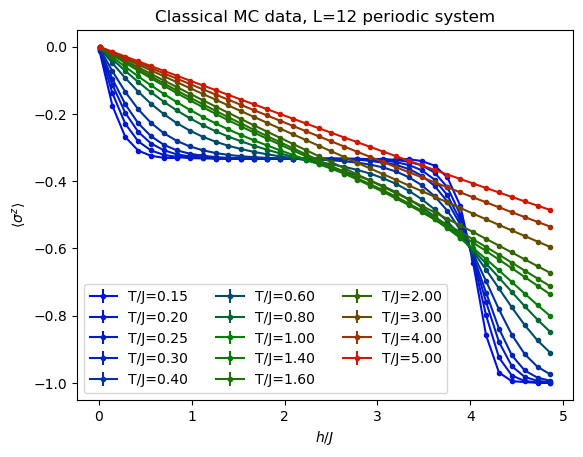

In [47]:

for j in range(2,len(temps)-1):

    tarr = ary[(indices[j]+1):(indices[j+1]-2)]
    plot_list_x = []
    plot_list_y = []
    plot_list_y_err = []
    for k in range(len(tarr)):
        plot_list_x.append(float(tarr[k].split(' ')[0]))
        plot_list_y.append(float(tarr[k].split(' ')[1]))
        err = float(tarr[k].split(' ')[2])
        if math.isnan(err):
            plot_list_y_err.append(0.0)
        else:
            plot_list_y_err.append(err)

    plt.errorbar(plot_list_x, plot_list_y, yerr = np.array(plot_list_y_err), label = 'T/J=' + temps[j], fmt = 'o-', color = cmap(float(temps[j])/6.0),markersize = 3)
plt.xlabel(r'$h/J$')
plt.ylabel(r'$\langle \sigma^z \rangle$')
plt.legend(ncol = 3)
plt.title("Classical MC data, L=12 periodic system")
plt.show()
    

# magnetization and S(2K) for kink placement

<Figure size 2000x2000 with 0 Axes>

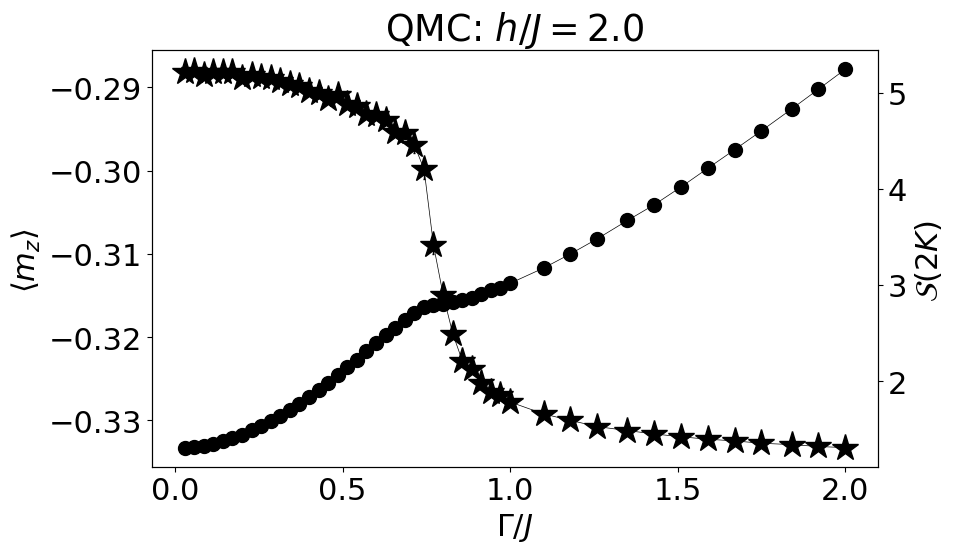

In [25]:
plt.figure(figsize=(4,4), dpi=500)
plt.rcParams.update({'font.size':22})
fig, ax1 = plt.subplots(figsize=(11,6))

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

hoverj_choose = [2.0]
indices_qmc = [list(hoverJ_qmc).index(hj) for hj in hoverj_choose]

for i in indices_qmc:
    hoverj = hoverJ_qmc[i]
    measurement_at_h = np.array(measurements[i])
    x = measurement_at_h[:,0]
    y = (-1)*measurement_at_h[:,1]
    yerr = measurement_at_h[:,2] 
    ax1.errorbar(
        x,
        y,
        yerr=yerr,
        c= 'black',
        zorder = -i,
        ms=20,
        lw=0.5,
        fmt='.-',
        capsize=1,
        alpha=1,
        ecolor='black',
        markeredgecolor='black',
        elinewidth=1,
    )

    y2 = measurement_at_h[:,8]
    yerr2 = measurement_at_h[:,9]

    ax2.errorbar(
        x,
        y2,
        yerr=yerr2,
        c= 'black',
        zorder = -i,
        ms=20,
        lw=0.5,
        fmt='*-',
        capsize=1,
        alpha=1,
        ecolor='black',
        markeredgecolor='black',
        elinewidth=1,
    )

    
ax1.set_xlabel(r'$ \Gamma/J $')
ax1.set_ylabel( r'$\langle m_z \rangle$ ')
ax2.set_ylabel( r'$\mathcal{S}(2K)$ ')
# plt.yticks(np.arange(-0.36,-0.28,0.02))
# plt.xscale('log')
plt.title(r'QMC: $h/J = 2.0$')
plt.tight_layout()

plt.show()

from QA data:

<Figure size 2000x2000 with 0 Axes>

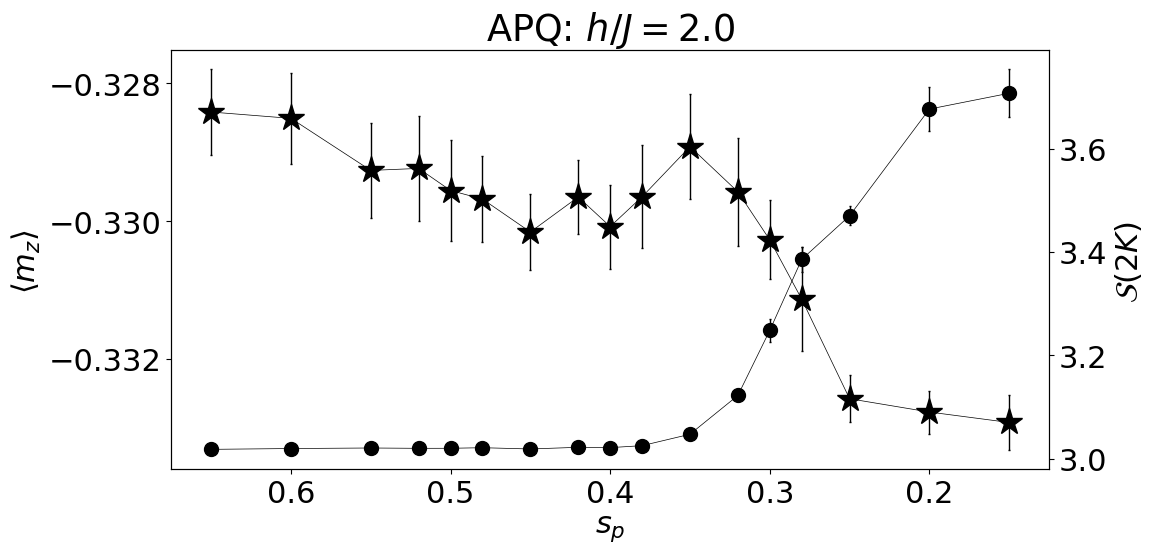

In [27]:
plt.figure(figsize=(4,4), dpi=500)
plt.rcParams.update({'font.size':22})
fig, ax1 = plt.subplots(figsize=(12,6))

slist= np.round(sorted(list(np.arange(0.15,0.651,0.05)) + [0.275,0.325,0.375,0.425, 0.475, 0.525]),2)
hoverjlist = [0, 0.1, 0.17, 0.25, 0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75, 3.88, 4, 4.06, 4.13, 4.25, 4.5]

K_mean_JKestimate_arr = np.load("./data/K_mean_JKestimate_arr.npy", allow_pickle= True)
K_mean_JKerr_arr = np.load("./data/K_mean_JKerr_arr.npy", allow_pickle= True)

mz = np.load("./data/gooddowntri_mag_mean_JKestimate_arr_arr_hj=2.npy", allow_pickle= True)
mz_err = np.load("./data/gooddowntri_mag_mean_JKerr_arr_hj=2.npy", allow_pickle= True)


# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

ind = hoverjlist.index(2.0)
hoverj = hoverjlist[ind]
x=slist
y1 = mz
yerr1 = mz_err
y2 = K_mean_JKestimate_arr[ind] * 168
yerr2= K_mean_JKerr_arr[ind] * 168

ax1.errorbar(
    x,
    y1,
    yerr=yerr1,
    c= 'black',
    zorder = -i,
    ms=20,
    lw=0.5,
    fmt='.-',
    capsize=1,
    alpha=1,
    ecolor='black',
    markeredgecolor='black',
    elinewidth=1,
)


ax2.errorbar(
    x,
    y2,
    yerr=yerr2,
    c= 'black',
    zorder = -i,
    ms=20,
    lw=0.5,
    fmt='*-',
    capsize=1,
    alpha=1,
    ecolor='black',
    markeredgecolor='black',
    elinewidth=1,
)

    
ax1.set_xlabel(r'$ s_p $')
ax1.set_ylabel( r'$\langle m_z \rangle$ ')
ax2.set_ylabel( r'$\mathcal{S}(2K)$ ')
# plt.yticks(np.arange(-0.36,-0.28,0.02))
# plt.xscale('log')
ax = plt.gca()
ax.invert_xaxis()
plt.title(r'APQ: $h/J = 2.0$')
plt.tight_layout()

plt.show()

# plot S(2K) QA vs QMC

In [4]:
K_mean_JKestimate_arr = np.load("./data/K_mean_JKestimate_arr.npy", allow_pickle= True)
K_mean_JKerr_arr = np.load("./data/K_mean_JKerr_arr.npy", allow_pickle= True)
M_mean_JKestimate_arr = np.load("./data/M_mean_JKestimate_arr.npy", allow_pickle= True)
M_mean_JKerr_arr = np.load("./data/M_mean_JKerr_arr.npy", allow_pickle= True)


#QMC data:

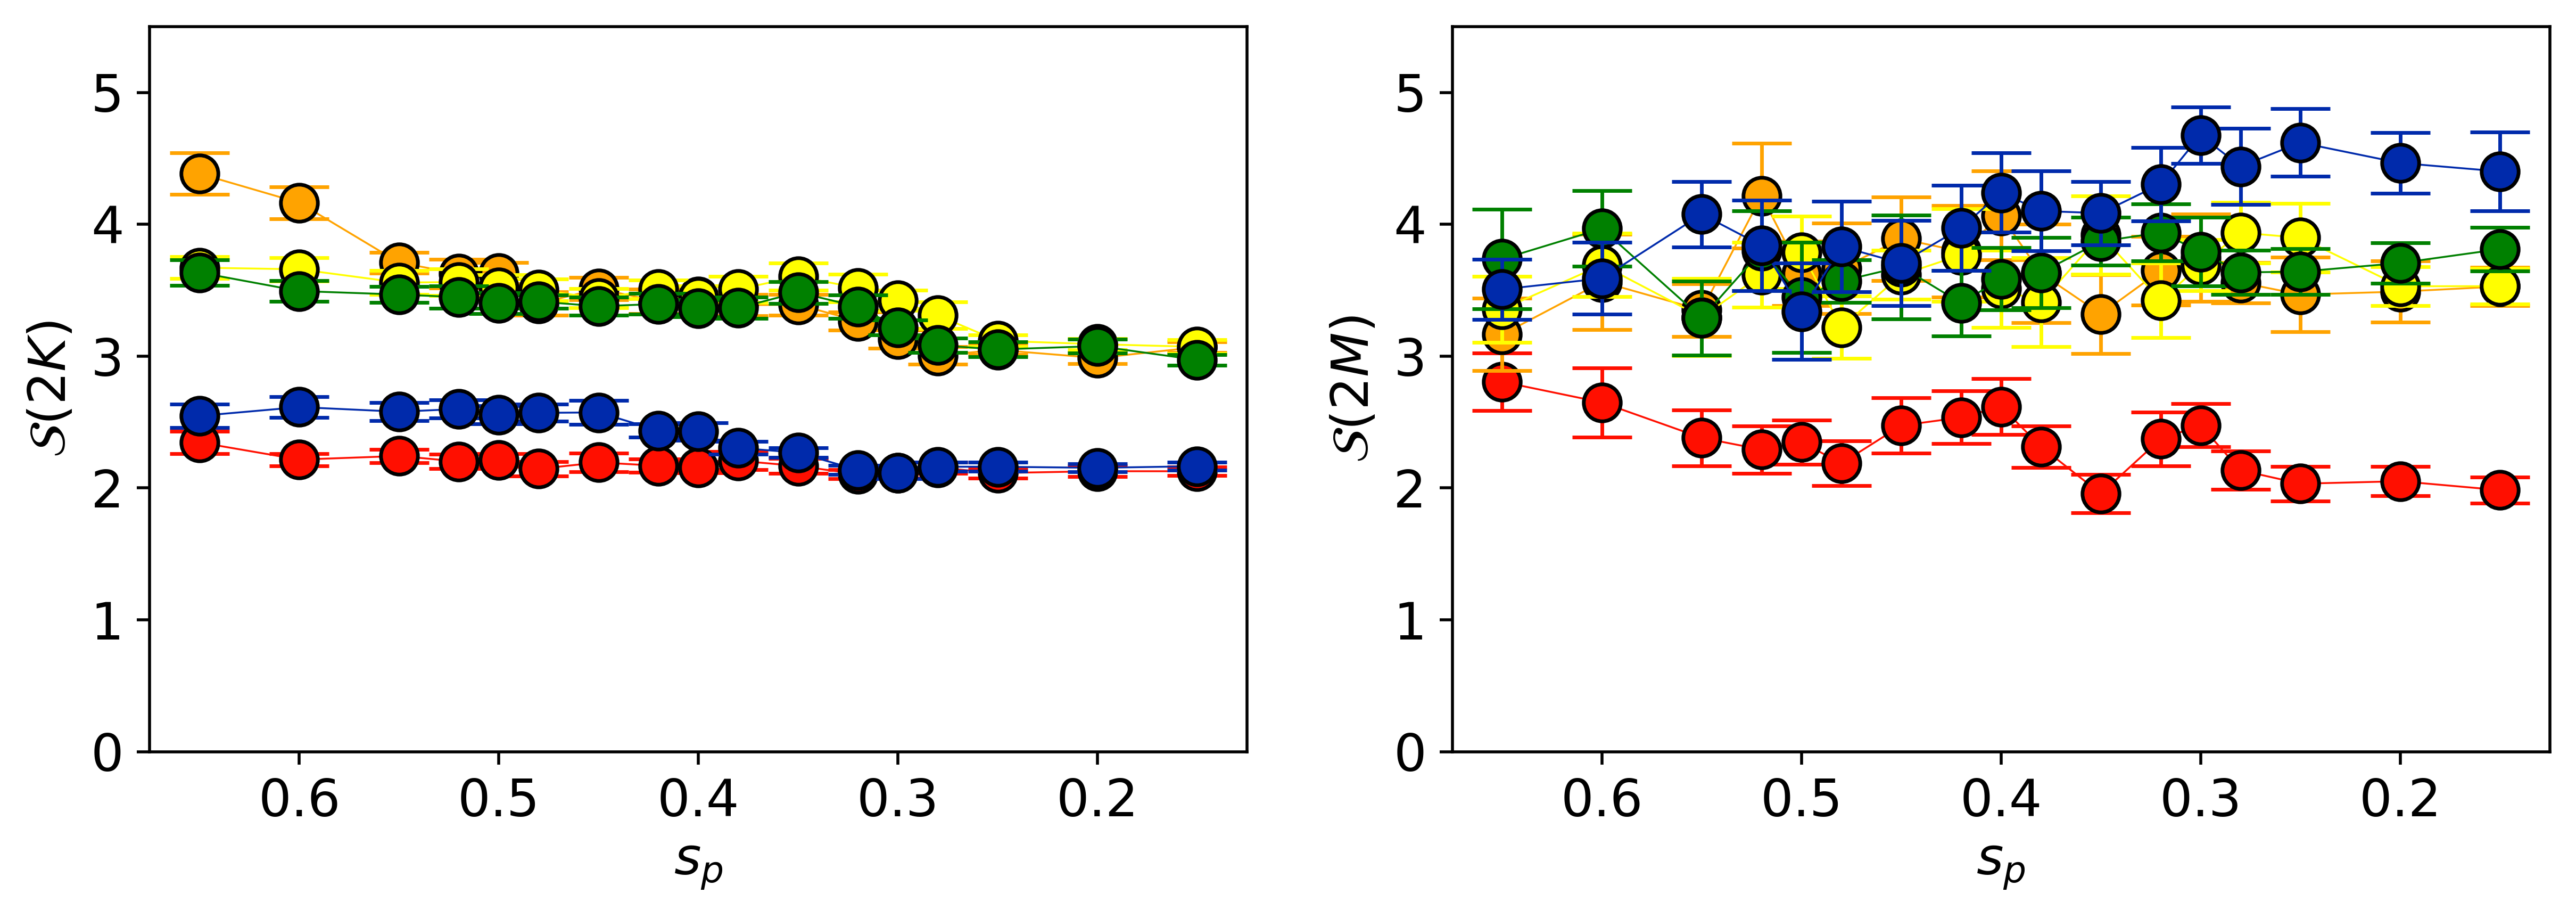

In [62]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5), dpi=500)
plt.tight_layout()
slist= np.round(sorted(list(np.arange(0.15,0.651,0.05)) + [0.275,0.325,0.375,0.425, 0.475, 0.525]),2)
hoverjlist = [0, 0.1, 0.17, 0.25, 0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75, 3.88, 4, 4.06, 4.13, 4.25, 4.5]

colors = np.linspace(0, 1, len(hoverjlist))


hoverj_choose = [0.1,1,2,3,4]

for i in [hoverjlist.index(hj) for hj in hoverj_choose]:
    hoverj = hoverjlist[i]
    
    x=slist
    y1=K_mean_JKestimate_arr[i] * 168
    yerr1=K_mean_JKerr_arr[i] * 168
    y2=M_mean_JKestimate_arr[i] * 168
    yerr2=M_mean_JKerr_arr[i] * 168
    
    elc='black'
    mec='black'
    elw=1
    ms=10
    cs=8
    
    ax[0].errorbar(
        x,
        y1,
        yerr=yerr1,
        label=round(hoverj, 1),
        c= cmap(hoverjlist[i]/cvals[-1]),
        zorder = i,
        marker = 'o',
        lw=0.5,
        alpha=1,
        markeredgecolor=mec,
        elinewidth=elw,
        ms=ms,
        capsize=cs
    )
    ax[0].set_ylabel(r'$ \mathcal{S}(2K)$')

    
    ax[1].errorbar(
        x,
        y2,
        yerr=yerr2,
        label=round(hoverj, 1),
        c= cmap(hoverjlist[i]/cvals[-1]),
        zorder = i,
        marker = 'o',
        lw=0.5,
        alpha=1,
        markeredgecolor=mec,
        elinewidth=elw,
        ms=ms,
        capsize=cs
        
    )
    ax[1].set_ylabel(r'$ \mathcal{S}(2M) $')



for axis in ax.flat:
#     axis.set_xlabel(r'$ \frac {A(s_p)} {B(s_p)} \approx \frac {\Gamma}{J} $')
    axis.set_xlabel(r'$ s_p $')
    axis.invert_xaxis()
    axis.set_ylim([0,5.5])
#     axis.set_xscale('log')
#     axis.grid(x='on',y='on')


# Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap)
# sm.set_array(cvals)

# fig.subplots_adjust(right=0.95)
# cbar_ax = fig.add_axes([0.953, 0.02, 0.01, 0.8])
# fig.colorbar(sm, label=r'$ h/J $', cax=cbar_ax)
# plt.tight_layout()

plt.show()

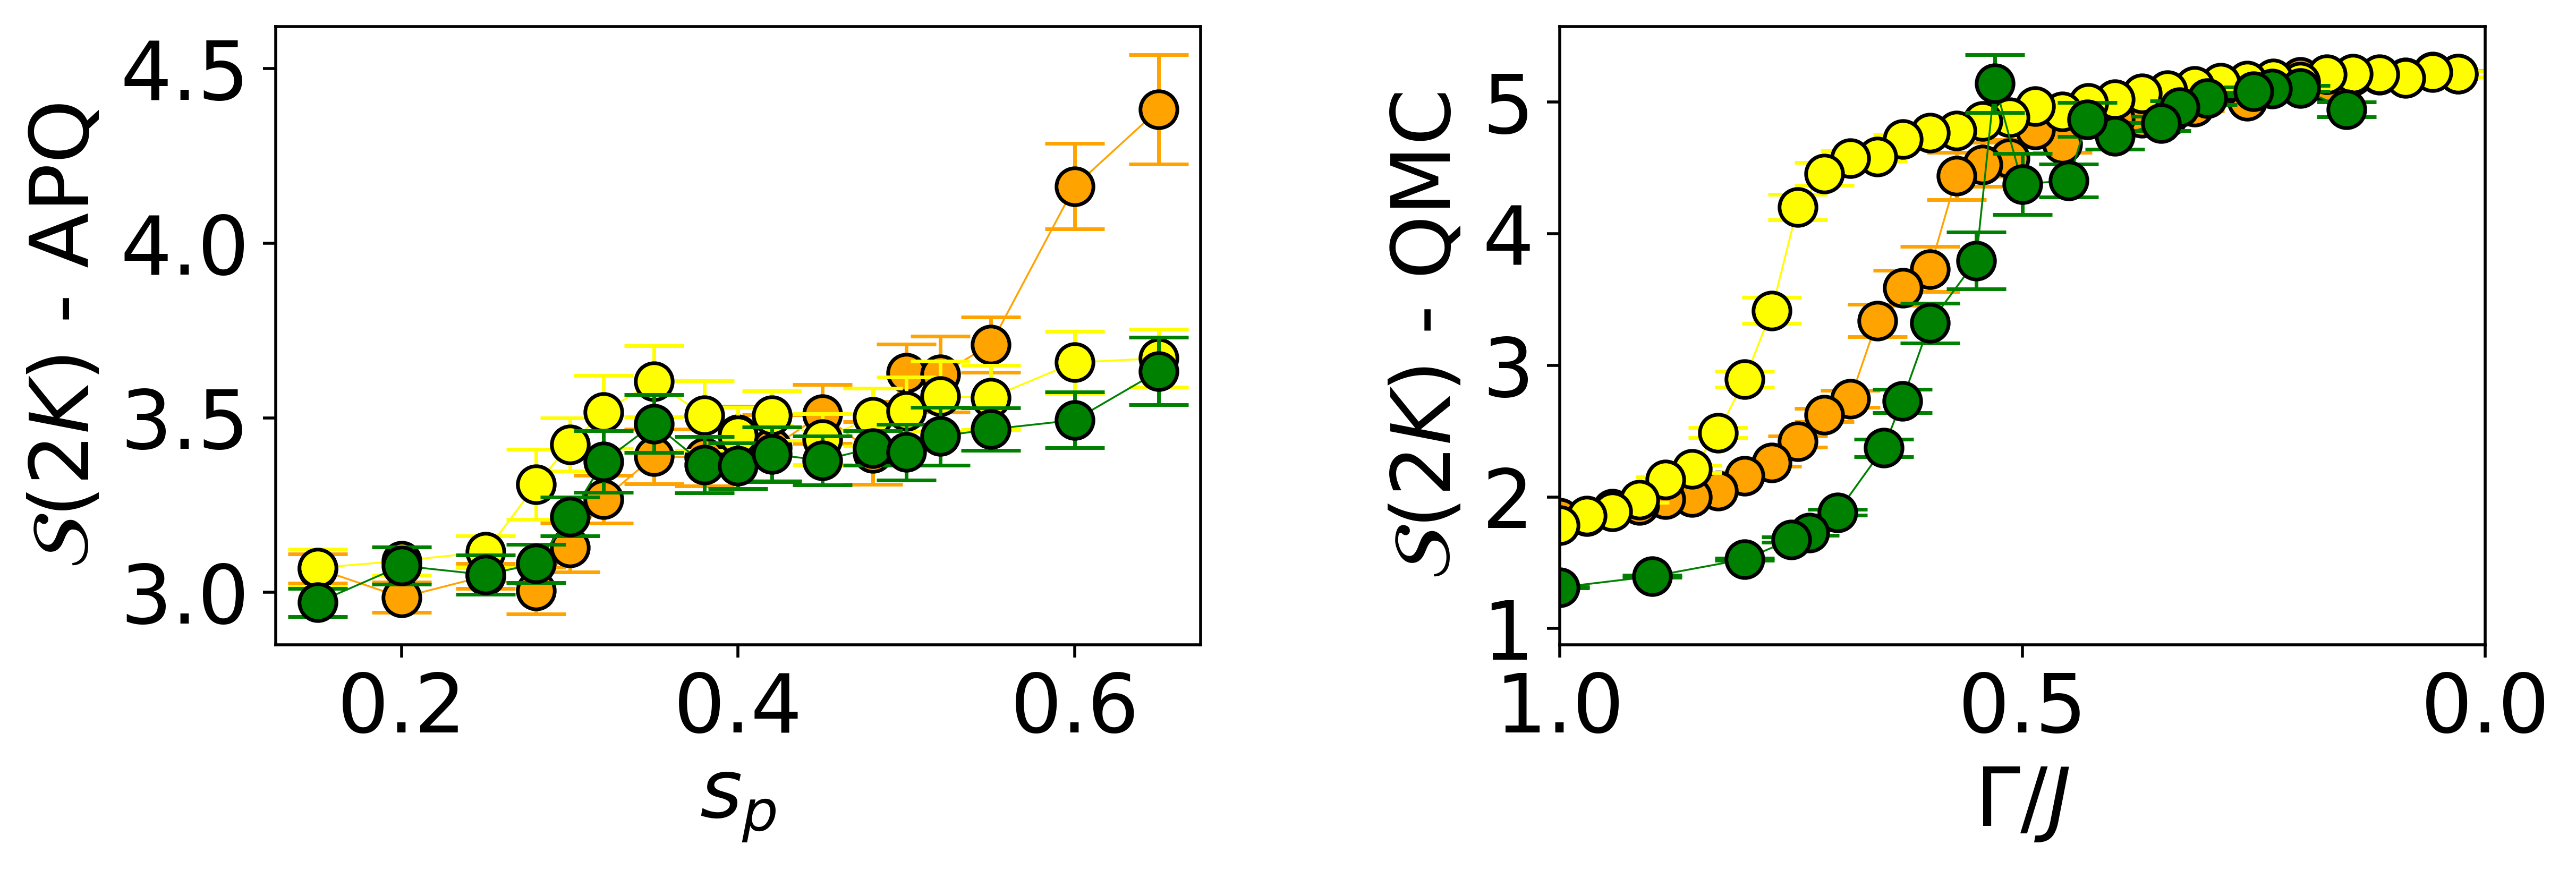

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5), dpi=500)
plt.tight_layout()
slist= np.round(sorted(list(np.arange(0.15,0.651,0.05)) + [0.275,0.325,0.375,0.425, 0.475, 0.525]),2)
hoverjlist = [0, 0.1, 0.17, 0.25, 0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75, 3.88, 4, 4.06, 4.13, 4.25, 4.5]

colors = np.linspace(0, 1, len(hoverjlist))


hoverj_choose = [1,2,3]
indices_qa = [hoverjlist.index(hj) for hj in hoverj_choose]
indices_qmc = [list(hoverJ_qmc).index(hj) for hj in hoverj_choose]

for k in range(len(hoverj_choose)):
    i = indices_qa[k]
    hoverj = hoverjlist[i]
    
    x=slist
    y1=K_mean_JKestimate_arr[i] * 168
    yerr1=K_mean_JKerr_arr[i] * 168
    
    elc='black'
    mec='black'
    elw=1
    ms=10
    cs=8
    
    ax[0].errorbar(
        x,
        y1,
        yerr=yerr1,
        label=round(hoverj, 1),
        c= cmap(hoverjlist[i]/cvals[-1]),
        zorder = i,
        marker = 'o',
        lw=0.5,
        alpha=1,
        markeredgecolor=mec,
        elinewidth=elw,
        ms=ms,
        capsize=cs
    )
    ax[0].set_ylabel(r'$ \mathcal{S}(2K)$ - APQ')
    ax[0].set_xlabel(r'$ s_p $')
    # ax[0].set_title('APQ')
    ax[0].invert_xaxis()
    ax[0].set_yticks([3.0, 3.5, 4.0, 4.5])

    j = indices_qmc[k]
    measurement_at_h = np.array(measurements[j])
    x = measurement_at_h[:,0]
    y2 = measurement_at_h[:,8]
    yerr2 = measurement_at_h[:,9]

    
    ax[1].errorbar(
        x,
        y2,
        yerr=yerr2,
        label=round(hoverj, 1),
        c= cmap(hoverJ_qmc[j]/cvals[-1]),
        zorder = k,
        marker = 'o',
        lw=0.5,
        alpha=1,
        markeredgecolor=mec,
        elinewidth=elw,
        ms=ms,
        capsize=cs
        
    )
    ax[1].set_ylabel(r'$ \mathcal{S}(2K)$ - QMC')
    ax[1].set_xlabel(r'$ \Gamma/J $')
    ax[1].set_xlim([0,1])
    # ax[1].set_title('QMC')
    ax[1].set_yticks([1.0, 2.0, 3.0, 4.0, 5.0])



for axis in ax.flat:
#     axis.set_xlabel(r'$ \frac {A(s_p)} {B(s_p)} \approx \frac {\Gamma}{J} $')
    axis.invert_xaxis()
    # axis.set_ylim([0,5.5])
#     axis.set_xscale('log')
#     axis.grid(x='on',y='on')


# Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap)
# sm.set_array(cvals)

# fig.subplots_adjust(right=0.95)
# cbar_ax = fig.add_axes([0.953, 0.02, 0.01, 0.8])
# fig.colorbar(sm, label=r'$ h/J $', cax=cbar_ax)
# plt.tight_layout()

plt.show()

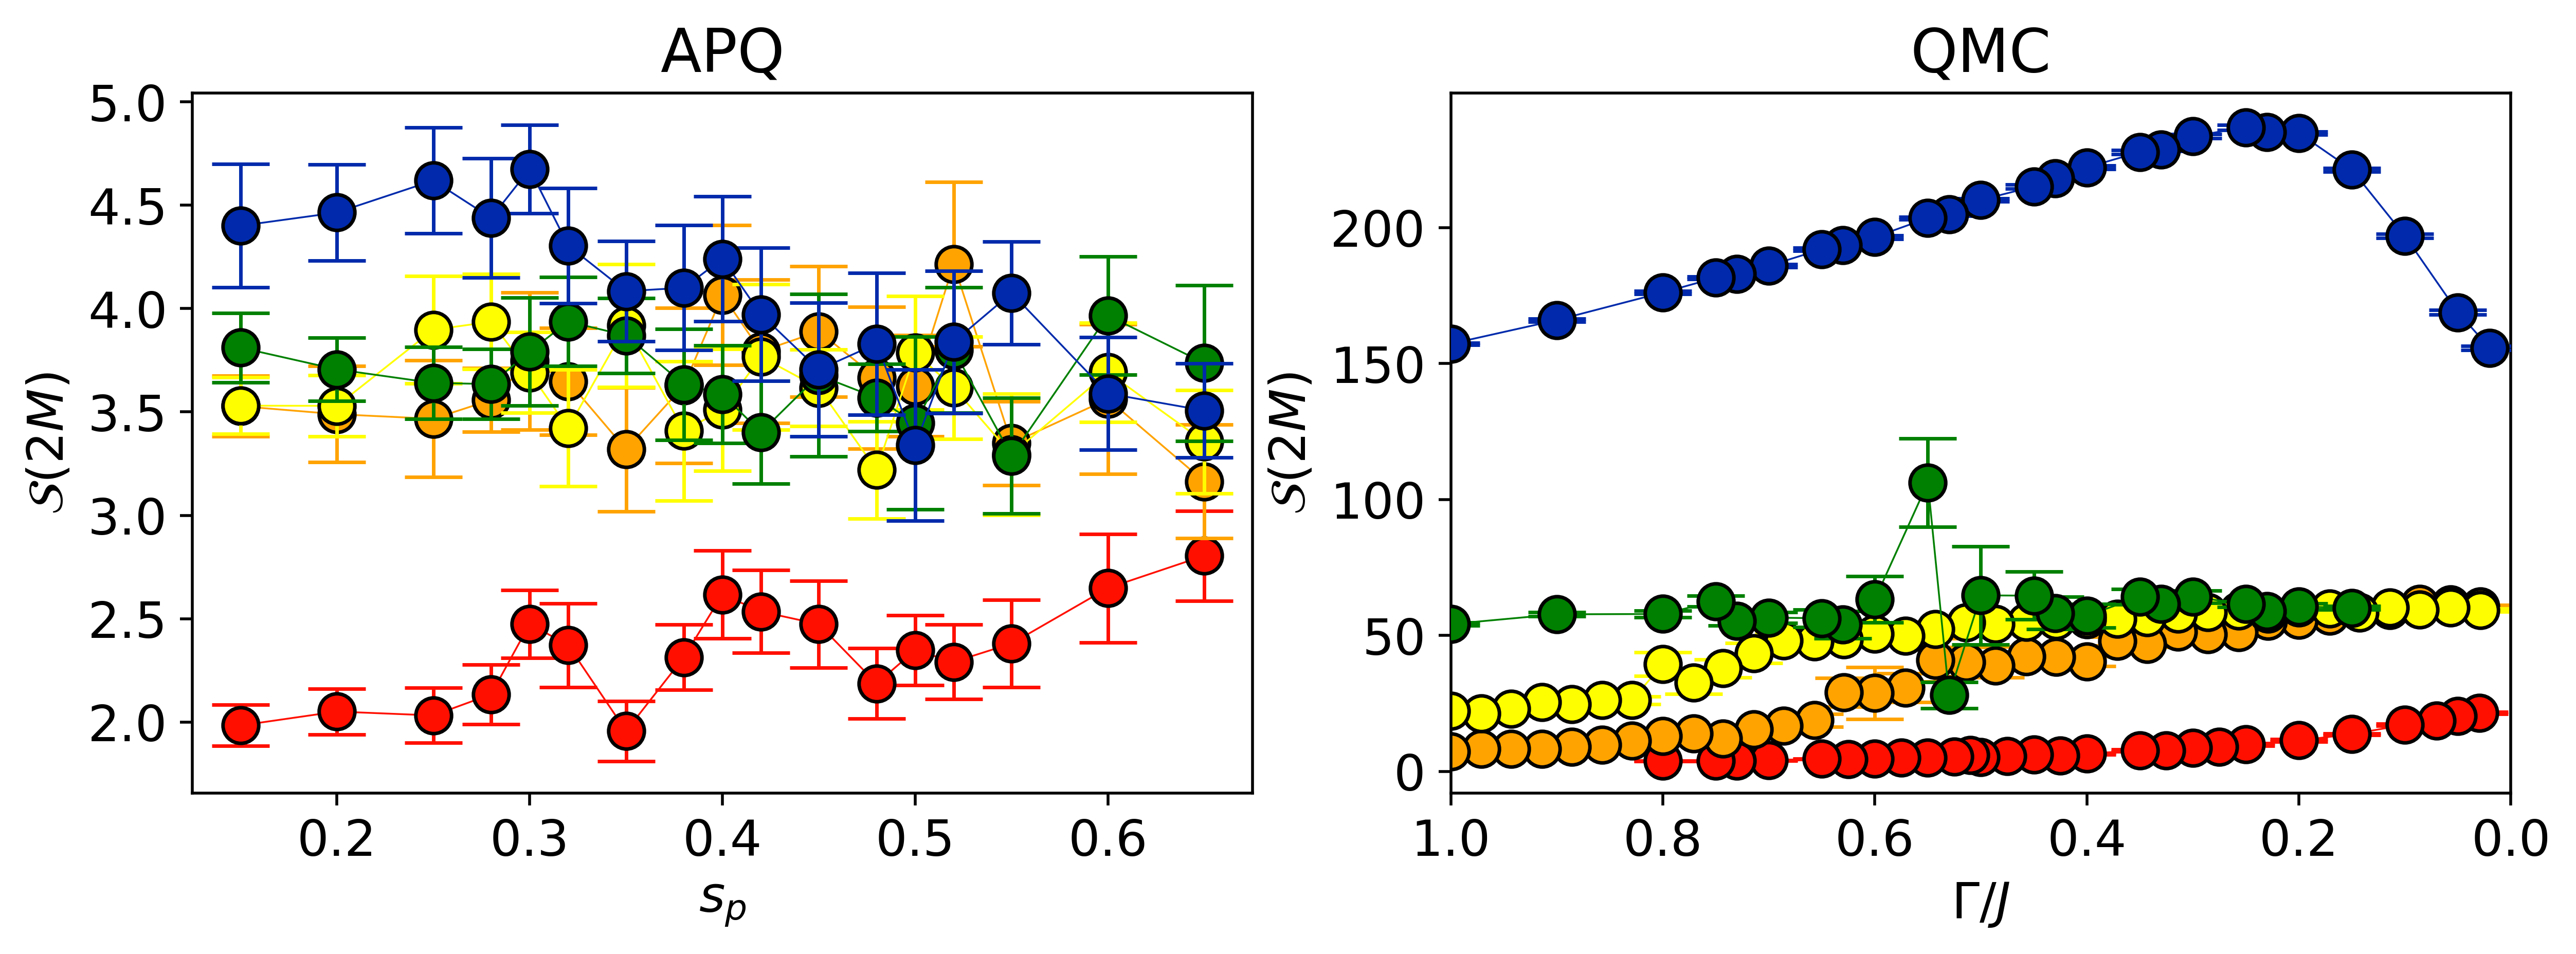

In [79]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5), dpi=500)
plt.tight_layout()
slist= np.round(sorted(list(np.arange(0.15,0.651,0.05)) + [0.275,0.325,0.375,0.425, 0.475, 0.525]),2)
hoverjlist = [0, 0.1, 0.17, 0.25, 0.5, 0.75, 1, 1.25, 2, 2.5, 3, 3.25, 3.5, 3.75, 3.88, 4, 4.06, 4.13, 4.25, 4.5]

colors = np.linspace(0, 1, len(hoverjlist))


hoverj_choose = [0.1,1,2,3,4]
indices_qa = [hoverjlist.index(hj) for hj in hoverj_choose]
indices_qmc = [list(hoverJ_qmc).index(hj) for hj in hoverj_choose]

for k in range(len(hoverj_choose)):
    i = indices_qa[k]
    hoverj = hoverjlist[i]
    
    x=slist
    y1=M_mean_JKestimate_arr[i] * 168
    yerr1=M_mean_JKerr_arr[i] * 168
    
    elc='black'
    mec='black'
    elw=1
    ms=10
    cs=8
    
    ax[0].errorbar(
        x,
        y1,
        yerr=yerr1,
        label=round(hoverj, 1),
        c= cmap(hoverjlist[i]/cvals[-1]),
        zorder = i,
        marker = 'o',
        lw=0.5,
        alpha=1,
        markeredgecolor=mec,
        elinewidth=elw,
        ms=ms,
        capsize=cs
    )
    ax[0].set_ylabel(r'$ \mathcal{S}(2M)$')
    ax[0].set_xlabel(r'$ s_p $')
    ax[0].set_title('APQ')
    ax[0].invert_xaxis()

    j = indices_qmc[k]
    measurement_at_h = np.array(measurements[j])
    x = measurement_at_h[:,0]
    y2 = measurement_at_h[:,10]
    yerr2 = measurement_at_h[:,11]

    
    ax[1].errorbar(
        x,
        y2,
        yerr=yerr2,
        label=round(hoverj, 1),
        c= cmap(hoverJ_qmc[j]/cvals[-1]),
        zorder = k,
        marker = 'o',
        lw=0.5,
        alpha=1,
        markeredgecolor=mec,
        elinewidth=elw,
        ms=ms,
        capsize=cs
        
    )
    ax[1].set_ylabel(r'$ \mathcal{S}(2M) $')
    ax[1].set_xlabel(r'$ \Gamma/J $')
    ax[1].set_xlim([0,1])
    ax[1].set_title('QMC')



for axis in ax.flat:
#     axis.set_xlabel(r'$ \frac {A(s_p)} {B(s_p)} \approx \frac {\Gamma}{J} $')
    axis.invert_xaxis()
    # axis.set_ylim([0,200])
#     axis.set_xscale('log')
#     axis.grid(x='on',y='on')


# Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap)
# sm.set_array(cvals)

# fig.subplots_adjust(right=0.95)
# cbar_ax = fig.add_axes([0.953, 0.02, 0.01, 0.8])
# fig.colorbar(sm, label=r'$ h/J $', cax=cbar_ax)
# plt.tight_layout()

plt.show()